In [1]:
# import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load your dataset into a DataFrame
file_path = 'C:\\Users\\Deepak\\Desktop\\SaleData.xlsx'
data = pd.read_excel(file_path)

In [10]:
# Check the first few rows of the dataset to understand its structure
print(data.head())

   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television   95.0      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater   50.0       500.0   
2 2018-02-09  Central  Hermann       Luis    Television   36.0      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone   27.0       225.0   
4 2018-03-15     West  Timothy    Stephen    Television   56.0      1198.0   

   Sale_amt  
0  113810.0  
1   25000.0  
2   43128.0  
3    6075.0  
4   67088.0  


In [11]:
# Check the data types of each column
print(data.dtypes)

OrderDate     datetime64[ns]
Region                object
Manager               object
SalesMan              object
Item                  object
Units                float64
Unit_price           float64
Sale_amt             float64
dtype: object


In [12]:
# Check basic statistics of numerical columns
print(data.describe())

            Units   Unit_price       Sale_amt
count   45.000000    45.000000      45.000000
mean    54.083333   583.313889   30578.761111
std     45.096676   444.806622   32227.534943
min      2.000000    58.500000     250.000000
25%     28.000000   225.000000    4329.000000
50%     53.000000   500.000000   17100.000000
75%     75.000000  1198.000000   43128.000000
max    278.000000  1198.000000  113810.000000


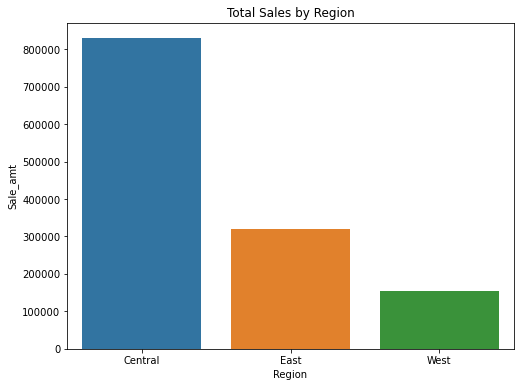

In [13]:
# Total Sales by Region
total_sales_by_region = data.groupby('Region')['Sale_amt'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Sale_amt', data=total_sales_by_region)
plt.title('Total Sales by Region')
plt.show()

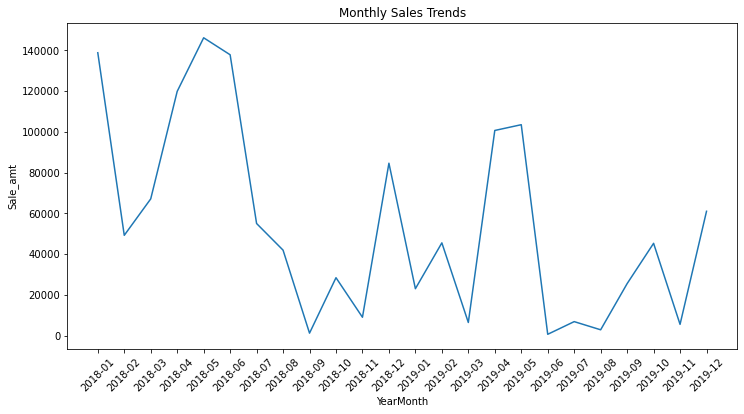

In [16]:
# Monthly Sales Trends
# Convert the 'OrderDate' column to datetime
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Extract month and year from 'OrderDate'
data['YearMonth'] = data['OrderDate'].dt.to_period('M')
data['YearMonth'] = data['YearMonth'].dt.strftime('%Y-%m')  # Convert to string format

# Calculate monthly sales
monthly_sales = data.groupby('YearMonth')['Sale_amt'].sum().reset_index()

# Visualize monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Sale_amt', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.show()

In [17]:
# 3. Best Selling Items
best_selling_items = data.groupby('Item')['Sale_amt'].sum().sort_values(ascending=False)
print("Top Selling Items:")
print(best_selling_items)

Top Selling Items:
Item
Television      857768.0
Home Theater    361000.0
Cell Phone       62550.0
Video Games      23107.5
Desk              1250.0
Name: Sale_amt, dtype: float64


Salesman Performance:
SalesMan
Alexander    236703.0
Luis         206373.0
Steven       199690.0
David        140955.0
Sigal        125037.5
John         124016.0
Stephen       88063.0
Michael       66836.0
Karen         48204.0
Diana         36100.0
Shelli        33698.0
Name: Sale_amt, dtype: float64


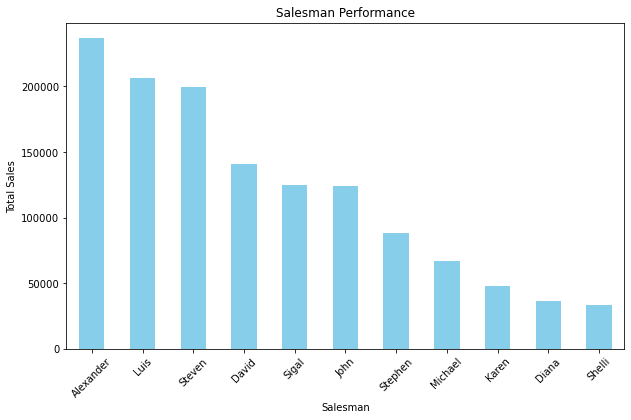

In [24]:
# 4. Performance by Salesman
salesman_performance = data.groupby('SalesMan')['Sale_amt'].sum().sort_values(ascending=False)
print("Salesman Performance:")
print(salesman_performance)

# Plot bar graph for salesman performance
plt.figure(figsize=(10, 6))
salesman_performance.plot(kind='bar', color='skyblue')
plt.title('Salesman Performance')
plt.ylabel('Total Sales')
plt.xlabel('Salesman')
plt.xticks(rotation=45)
plt.show()

Item-wise Analysis:
                   sum          mean       max     min
Item                                                  
Cell Phone     62550.0  12510.000000   21600.0  3375.0
Desk            1250.0    416.666667     625.0   250.0
Home Theater  361000.0  24066.666667   47000.0  2000.0
Television    857768.0  65982.153846  113810.0  8386.0
Video Games    23107.5   3301.071429    5616.0   936.0


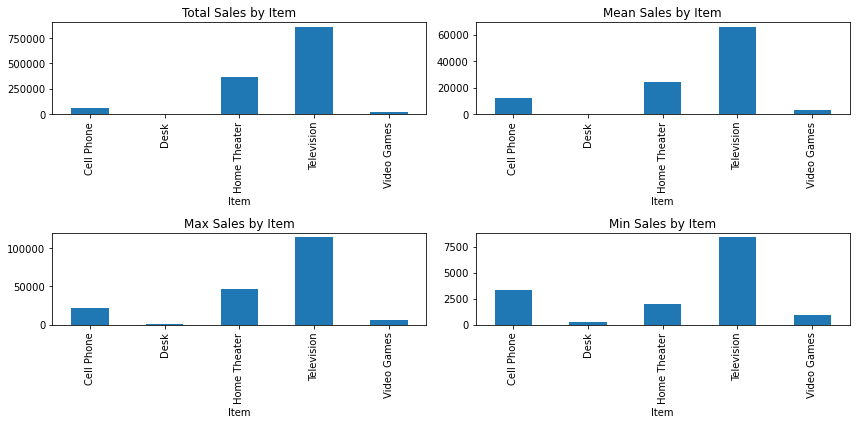

In [22]:
# 5. Item-wise Analysis
item_wise_analysis = data.groupby('Item')['Sale_amt'].agg(['sum', 'mean', 'max', 'min'])
print("Item-wise Analysis:")
print(item_wise_analysis)

# Plot bar graphs for item-wise analysis
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
item_wise_analysis['sum'].plot(kind='bar')
plt.title('Total Sales by Item')

plt.subplot(2, 2, 2)
item_wise_analysis['mean'].plot(kind='bar')
plt.title('Mean Sales by Item')

plt.subplot(2, 2, 3)
item_wise_analysis['max'].plot(kind='bar')
plt.title('Max Sales by Item')

plt.subplot(2, 2, 4)
item_wise_analysis['min'].plot(kind='bar')
plt.title('Min Sales by Item')

plt.tight_layout()
plt.show()


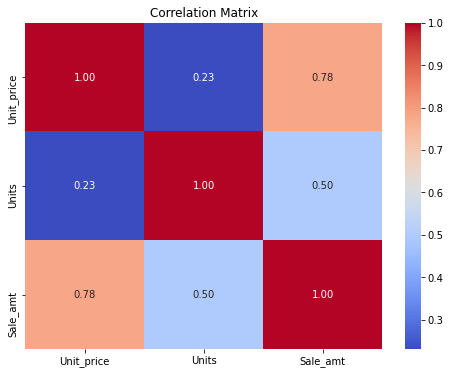

In [23]:
# 6. Correlation Analysis
correlation_matrix = data[['Unit_price', 'Units', 'Sale_amt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

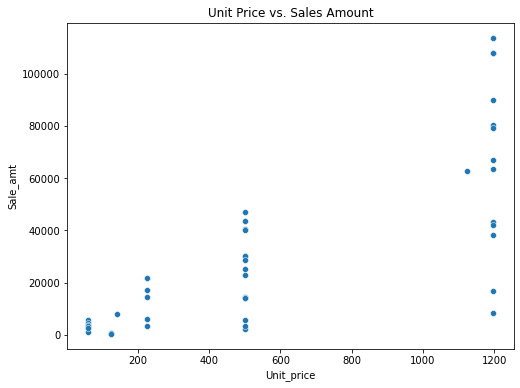

In [30]:
#Create a scatter plot to visualize the relationship between unit price and sales amount
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Unit_price',  y = 'Sale_amt', data = data)
plt.title('Unit Price vs. Sales Amount')
plt.show()

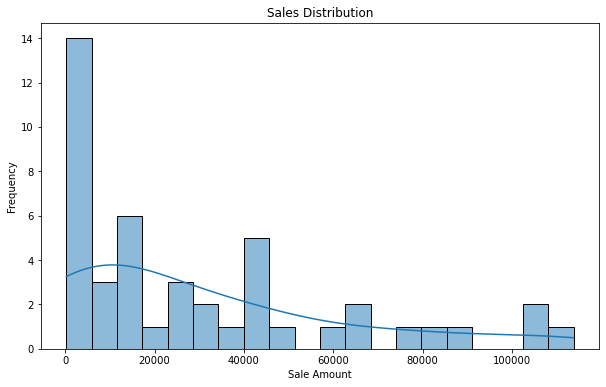

In [31]:
#Visualize the distribution of sales amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Sale_amt'], bins=20, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()

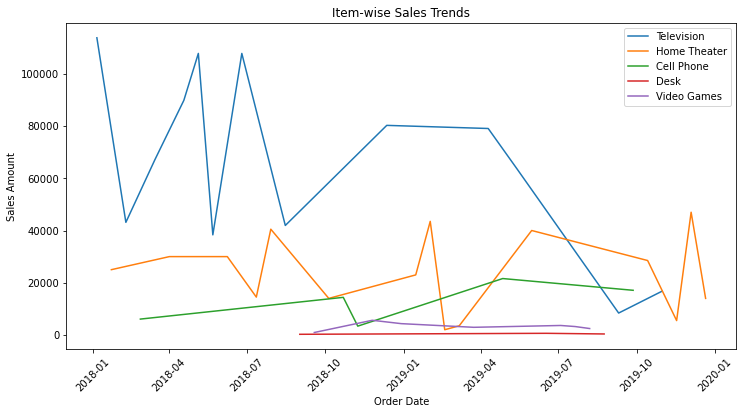

In [32]:
#Examine how the sales of specific items have evolved over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='OrderDate', y='Sale_amt', hue='Item', data=df)
plt.title('Item-wise Sales Trends')
plt.xlabel('Order Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

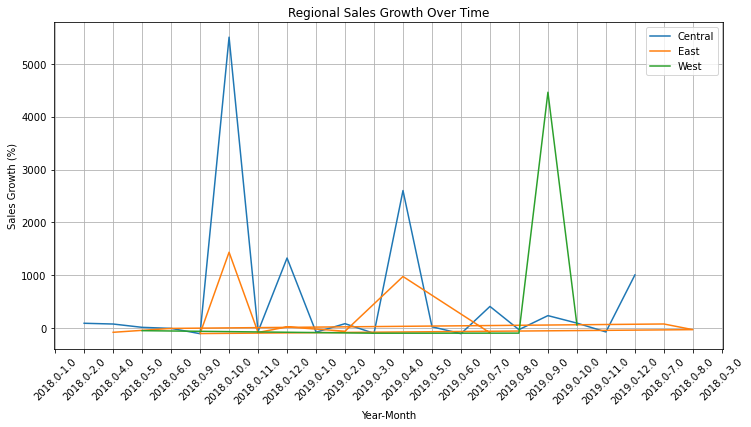

In [33]:
# Regional Sales Growth

# Convert the 'OrderDate' column to datetime
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Extract year and month from 'OrderDate'
data['Year'] = data['OrderDate'].dt.year
data['Month'] = data['OrderDate'].dt.month

# Group data by Region, Year, and Month and calculate total sales
regional_sales = data.groupby(['Region', 'Year', 'Month'])['Sale_amt'].sum().reset_index()

# Calculate the growth in sales for each region
regional_sales['Sales Growth'] = regional_sales.groupby('Region')['Sale_amt'].pct_change() * 100

# Plot the regional sales growth
plt.figure(figsize=(12, 6))
for region in regional_sales['Region'].unique():
    region_data = regional_sales[regional_sales['Region'] == region]
    plt.plot(region_data['Year'].astype(str) + '-' + region_data['Month'].astype(str), region_data['Sales Growth'], label=region)

plt.title('Regional Sales Growth Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales Growth (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
